In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy
%matplotlib inline
plt.rcParams['figure.figsize']=(12,3)

In [ ]:
# goal of this tutorial is to visualize
# EM updates for the case of GMM with 2 clusters

In [2]:
# sample 50 random points from 2 different distributions
# random mean (mu) and std (sigma)
x1 = np.random.normal(size = 50, loc = -1, scale = 0.4)
x2 = np.random.normal(size = 50, loc = 2, scale = 0.2) # loc - mean, var - std

In [3]:
print(x1[:5])
print(x2[:5])

[-1.28455869 -1.42414216 -0.40176126 -1.06731494 -1.76970395]
[1.65152372 1.79345742 1.93729684 2.15551423 2.13475727]


In [4]:
x = np.concatenate((x1,x2))

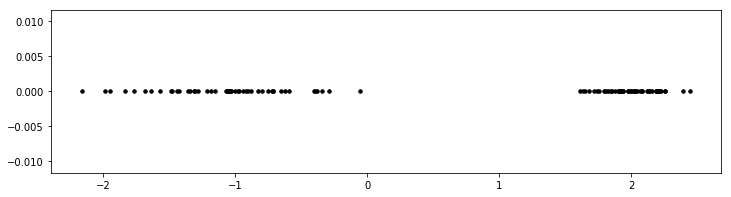

In [5]:
# let's try to visualize our original data
# since it's 1-D data, we'll do a scatter plot but plug in zeros for y values
plt.scatter(x, np.zeros((x.shape[0])), color='black', s=12, marker='o')

In [6]:
# INITIALIZING GAUSSIANS
mu1 = np.random.rand(1)-1 
mu2 = np.random.rand(1)
sigma1 = sigma2 = 0.2

u = np.array([mu1, mu2])
sigma = np.array([sigma1, sigma2])
pi = np.array([0.5, 0.5])

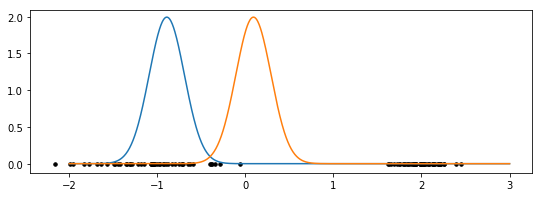

In [7]:
# now let's plot our points together with initial Gaussians
points = np.linspace(-2, 3, 1000)
plt.rcParams['figure.figsize']=(9,3)

for mu, s in zip(u, sigma):
    plt.plot(points, stats.norm.pdf(points, mu, s))

plt.scatter(x, np.zeros((x.shape[0])), color='black', s=12, marker='o')

In [8]:
# let's calculate data log-likelihood
N1 = scipy.stats.norm(u[0], sigma[0])
N2 = scipy.stats.norm(u[1], sigma[1])

log_likelihood = 0
for i, point in enumerate(x):
    log_likelihood += np.log(pi[0]*N1.pdf(x[i])+pi[1]*N2.pdf(x[i]))
    
print('log_likelihood = ', log_likelihood)

log_likelihood =  [-2432.7472894]


In [9]:
# let's make it into function
def get_log_likelihood(x_arr, u_arr, sigma_arr, pi_arr):
    N1 = scipy.stats.norm(u_arr[0], sigma_arr[0])
    N2 = scipy.stats.norm(u_arr[1], sigma_arr[1])
    
    log_likelihood = 0
    for i, point in enumerate(x_arr):
        log_likelihood += np.log(pi_arr[0]*N1.pdf(x_arr[i])+pi_arr[1]*N2.pdf(x_arr[i]))
        
    return log_likelihood

Text(0, 0.5, 'Data log-likelihood')

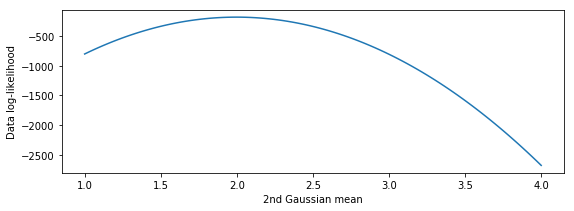

In [10]:
# let's try to visualize data log-likelihood 
# to get a 2D plot we'll fix all parameter to their current values
# except for u[1] (mean of the second Gaussian), which we will vary
mu = np.linspace(1, 4, 100)
plt.plot(mu, get_log_likelihood(x, np.array((u[0], mu)), sigma, pi))
plt.xlabel('2nd Gaussian mean')
plt.ylabel('Data log-likelihood')

/Users/VorobievaIrina/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1720: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Text(0, 0.5, 'Data log-likelihood')

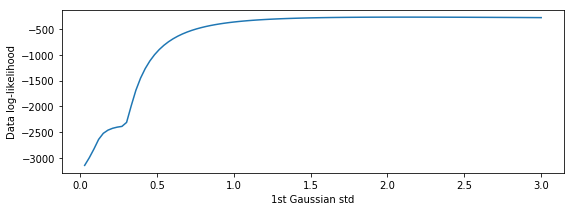

In [11]:
# we can vary any other parameter as well
# let's try fixing everything except for sigma[0] (first Gaussian std)
s = np.linspace(0, 3, 100)
plt.plot(s, get_log_likelihood(x, u, np.array((s, sigma[1])), pi))
plt.xlabel('1st Gaussian std')
plt.ylabel('Data log-likelihood')

Text(0, 0.5, 'Data log-likelihood')

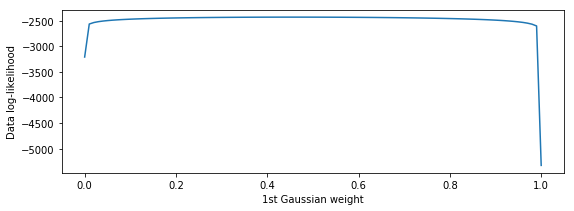

In [12]:
# we can vary any other parameter as well
# let's try fixing everything except for sigma[0] (first Gaussian variance)
p = np.linspace(0, 1, 100)
plt.plot(p, get_log_likelihood(x, u, sigma, np.array((p, 1-p)) ))
plt.xlabel('1st Gaussian weight')
plt.ylabel('Data log-likelihood')

In [13]:
# since we were only varying one parameter at a time
# it's very hard to find optimal values for all parameters by this method

In [14]:
# let's perform series of EM updates
# here we do E-step: find responsibilities for each data point in x

# E-STEP
N1 = scipy.stats.norm(u[0], sigma[0])
N2 = scipy.stats.norm(u[1], sigma[1])

R = np.empty((x.shape[0],2))

for i, point in enumerate(x):
    R[i,0] = pi[0]*N1.pdf(x[i]) / ( pi[0]*N1.pdf(x[i])+pi[1]*N2.pdf(x[i]) )
    R[i,1] = pi[1]*N2.pdf(x[i]) / ( pi[0]*N1.pdf(x[i])+pi[1]*N2.pdf(x[i]) )

In [15]:
R[:5]

array([[1.00000000e+00, 3.50547537e-10],
       [1.00000000e+00, 1.13198836e-11],
       [5.14965767e-01, 4.85034233e-01],
       [9.99999927e-01, 7.33075909e-08],
       [1.00000000e+00, 2.30601531e-15]])

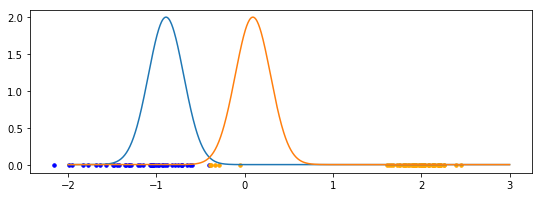

In [17]:
# two values of each point's responsibility vector show
# the probability of data point coming from one of two Gaussians
# to visualize how responsibilities were assigned,
# let's plot points in orange / blue depending on which value of their responsibility vector is higher
for i, point in enumerate(x):
    if R[i,0] < R[i,1]:
        col = 'orange'
    else:
        col = 'blue'
    plt.scatter(point, np.zeros((1)), color=col, s=12, marker='o')
    
# and let's plot our Gaussians as well
points = np.linspace(-2, 3, 1000)

for mu, s in zip(u, sigma):
    plt.plot(points, stats.norm.pdf(points, mu, s))

In [18]:
# the picture above makes a lot of sense!
# point get colored based on which Gaussian is more likely 
# to produce it (i.e. which PDF is higher at that point)

In [19]:
# now we are moving to M-step, where we update the parameters
# let's save old parameter values before update

# M-STEP
u_old = u
sigma_old = sigma
pi_old = pi

In [20]:
print("u_old =", u_old)
print("sigma_old =", sigma_old)
print("pi_old =", pi_old)

u_old = [[-0.8912093 ]
 [ 0.09255631]]
sigma_old = [0.2 0.2]
pi_old = [0.5 0.5]


In [21]:
# now let's perform M-step: update parameter values 
# using responsibilities from E-step
pi = np.average(R, axis=0)
    
u = np.empty(2)
for i in range(2):
    u[i] = np.dot(R[:,i],x) / np.sum(R[:,i])

sigma = np.empty(2)
for i in range(2):
    sigma[i] = np.sqrt( np.dot(R[:,i],(x-u[i])**2) / np.sum(R[:,i]) )

In [22]:
print("u =", u)
print("sigma =", sigma)
print("pi =", pi)

u = [-1.15293255  1.81340017]
sigma = [0.40809309 0.65041741]
pi = [0.45599021 0.54400979]


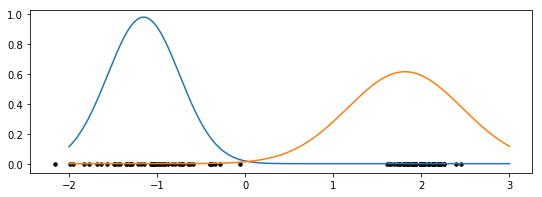

In [23]:
# let's plot our new Gaussians and points
points = np.linspace(-2, 3, 1000)

for mu, s in zip(u, sigma):
    plt.plot(points, stats.norm.pdf(points, mu, s))

plt.scatter(x, np.zeros((x.shape[0])), color='black', s=12, marker='o')

In [24]:
# we can see that new Gaussians model the data much better!

In [25]:
# let's see what happened to data-log likelihood and lower bound

N1 = scipy.stats.norm(u[0], sigma[0])
N2 = scipy.stats.norm(u[1], sigma[1])

lower_bound = np.empty(x.shape[0])
for i, point in enumerate(x):
    lower_bound += R[i,0]*np.log(pi[0]*N1.pdf(x[i])/R[i,0]) + \
                      R[i,1]*np.log(pi[1]*N2.pdf(x[i])/R[i,1] )


In [26]:
# code for calculating lower bound
N1 = scipy.stats.norm(u_old[0], sigma_old[0])
N2 = scipy.stats.norm(u_old[1], sigma_old[1])

lower_bound = 0
for i, point in enumerate(x):
    lower_bound += R[i,0]*np.log(pi_old[0]*N1.pdf(x[i])/R[i,0]) + \
                      R[i,1]*np.log(pi_old[1]*N2.pdf(x[i])/R[i,1] )
lower_bound

array([-2432.7472894])

In [27]:
# let's check wheter lower bound is tight 
# i.e. whether lower bound is equal to data
# log-likelihood at old parameter values
get_log_likelihood(x, u_old, sigma_old, pi_old)

array([-2432.7472894])

In [28]:
# Perfect match!

In [29]:
# define a function to get a lower bound
def get_lower_bound(x_arr, u_arr, sigma_arr, pi_arr, R):
    N1 = scipy.stats.norm(u_arr[0], sigma_arr[0])
    N2 = scipy.stats.norm(u_arr[1], sigma_arr[1])
    
    lower_bound = np.empty(100) # because we are varying 100 values for one of the Gaussian parameters
    for i, point in enumerate(x_arr):
        #log_likelihood += np.log(pi_arr[0]*N1.pdf(x_arr[i])+pi_arr[1]*N2.pdf(x_arr[i]))
        if (R[i,1]<0.0001):
            lower_bound += R[i,0]*np.log(pi_arr[0]*N1.pdf(x_arr[i])/R[i,0]) 
            
        elif (R[i,0]<0.0001):
            lower_bound += R[i,1]*np.log(pi_arr[1]*N2.pdf(x_arr[i])/R[i,1] ) 
            
        else:
           
            lower_bound += R[i,0]*np.log(pi_arr[0]*N1.pdf(x_arr[i])/R[i,0]) + R[i,1]*np.log(pi_arr[1]*N2.pdf(x_arr[i])/R[i,1] )
        
    return lower_bound

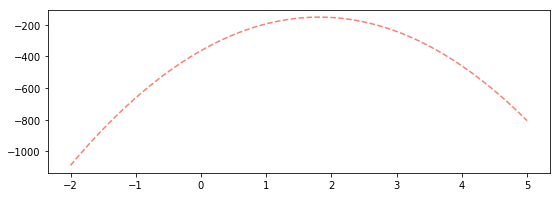

In [31]:
# plotting lower bound
mu = np.linspace(-2, 5, 100)
plt.plot(mu, get_lower_bound(x, np.array((u_old[0], mu)), sigma, pi, R), '--', color='salmon')

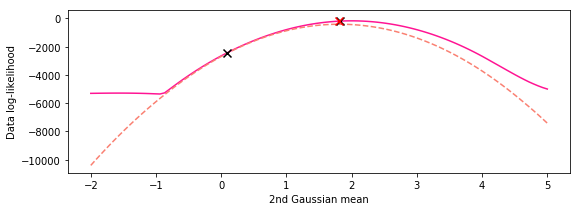

In [32]:
# now let's plot log-likelihood together with lower bound

mu = np.linspace(-2, 5, 100)
# plot log-likelihood with old parameter values, u2 is varied
plt.plot(mu, get_log_likelihood(x, np.array((u_old[0], mu)), sigma_old, pi_old), color='deeppink')
# plot lower bound estimate with old parameter values, u2 is varied
plt.plot(mu, get_lower_bound(x, np.array((u_old[0], mu)), sigma_old, pi_old, R), '--', color='salmon')
plt.xlabel('2nd Gaussian mean')
plt.ylabel('Data log-likelihood')

# now let's look at how our parameters have been updated
lower_bound = get_lower_bound(x, np.array((u_old[0], mu)), sigma_old, pi_old, R)

# u2_max = u2 value that maximizes lower bound
mu_max = mu[ np.argmax(lower_bound) ]
# log-likelihood value at u2_max
max_l = get_log_likelihood(x, np.array((u_old[0], mu_max)), sigma_old, pi_old)

# log-likelihood value with old parameters 
old_l = get_log_likelihood(x, np.array((u_old[0], u_old[1])), sigma_old, pi_old)

# log-likelihood value with new parameters 
new_l = get_log_likelihood(x, np.array((u_old[0], u[1])), sigma_old, pi_old)

plt.scatter(u_old[1], old_l, color='black', marker='x', s=64, zorder=10)
plt.scatter(mu_max, max_l, color='black', marker='x', s=64, zorder=10)
plt.scatter(u[1], new_l, color='red', marker='x', s=64, zorder=10)

Text(0, 0.5, 'Data log-likelihood')

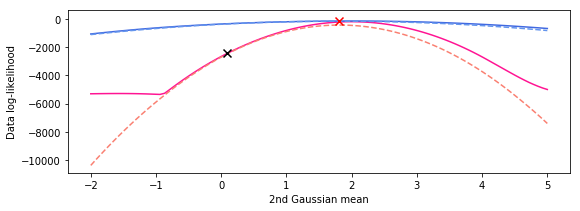

In [33]:
# now let's add to our plot updated lower bound and log-likelihood functions
# plot previous plot
plt.plot(mu, get_log_likelihood(x, np.array((u_old[0], mu)), sigma_old, pi_old), color='deeppink')
plt.plot(mu, get_lower_bound(x, np.array((u_old[0], mu)), sigma_old, pi_old, R), '--', color='salmon')
plt.scatter(u_old[1], old_l, color='black', marker='x', s=64, zorder=10)
#plt.scatter(mu_max, max_l, color='black', marker='x', s=64)
#plt.scatter(u[1], new_l, color='red', marker='x', s=64)

# plot new functions
plt.plot(mu, get_log_likelihood(x, np.array((u[0], mu)), sigma, pi), color='royalblue')
plt.plot(mu, get_lower_bound(x, np.array((u[0], mu)), sigma, pi, R), '--', color='cornflowerblue')
new_l = get_log_likelihood(x, np.array((u[0], u[1])), sigma, pi)
plt.scatter(u[1], new_l, color='red', marker='x', s=64, zorder=10)

plt.xlabel('2nd Gaussian mean')
plt.ylabel('Data log-likelihood')

In [ ]:
# pink plots - old lower bound (dashed line) / old log-likelihood (solid line)
# blue plots - new lower bound (dashed line) / new log-likelihood (solid line)